In [1]:
import numpy as np
import pandas as pd
import keras
import imageio
import pathlib
import cv2 as cv
from PIL import Image
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import os
%matplotlib inline

# Get the images and the labels

In [4]:
IMG_HEIGHT = 200   # Define the constant for image height that will be used for the network
IMG_WIDTH = 200    # Define the constant for image width that will be used for the network

# Define the function that will take in a directory of images and load them into a list and return them
def getData(directory):
    
    data = list()  # Python list to store the data in
    # Go through each file in the directory
    for file in os.listdir(directory):
        
        img_path = os.path.join(directory, file)           # Get the path for the image file
        img = np.array(Image.open(img_path))               # Open the image and make it into a numpy array
        img = np.resize(img, (IMG_HEIGHT, IMG_WIDTH, 3))   # Resize the image based on the height and width defined above
        img = img.astype('float32')                        # Cast each pixel as a float
        img /= 255                                         # Normalize the data so that it is between 0 - 1
        data.append(img)                                   # Append the image to the array
        
    return data

In [5]:
# Get all of the paths for the images in the data folder
training_data = np.array(getData('data/Training_Set/Training_Set/Training'))
validation_data = np.array(getData('data/Evaluation_Set/Evaluation_Set/Validation'))
testing_data = np.array(getData('data/Test_Set/Test_Set/Test'))

# Load in the labels data into pandas DF
training_labels = pd.read_csv('data/Training_Set/Training_Set/RFMiD_Training_Labels.csv')
validation_labels = pd.read_csv('data/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv')
test_labels = pd.read_csv('data/Test_Set/Test_Set/RFMiD_Testing_labels.csv')

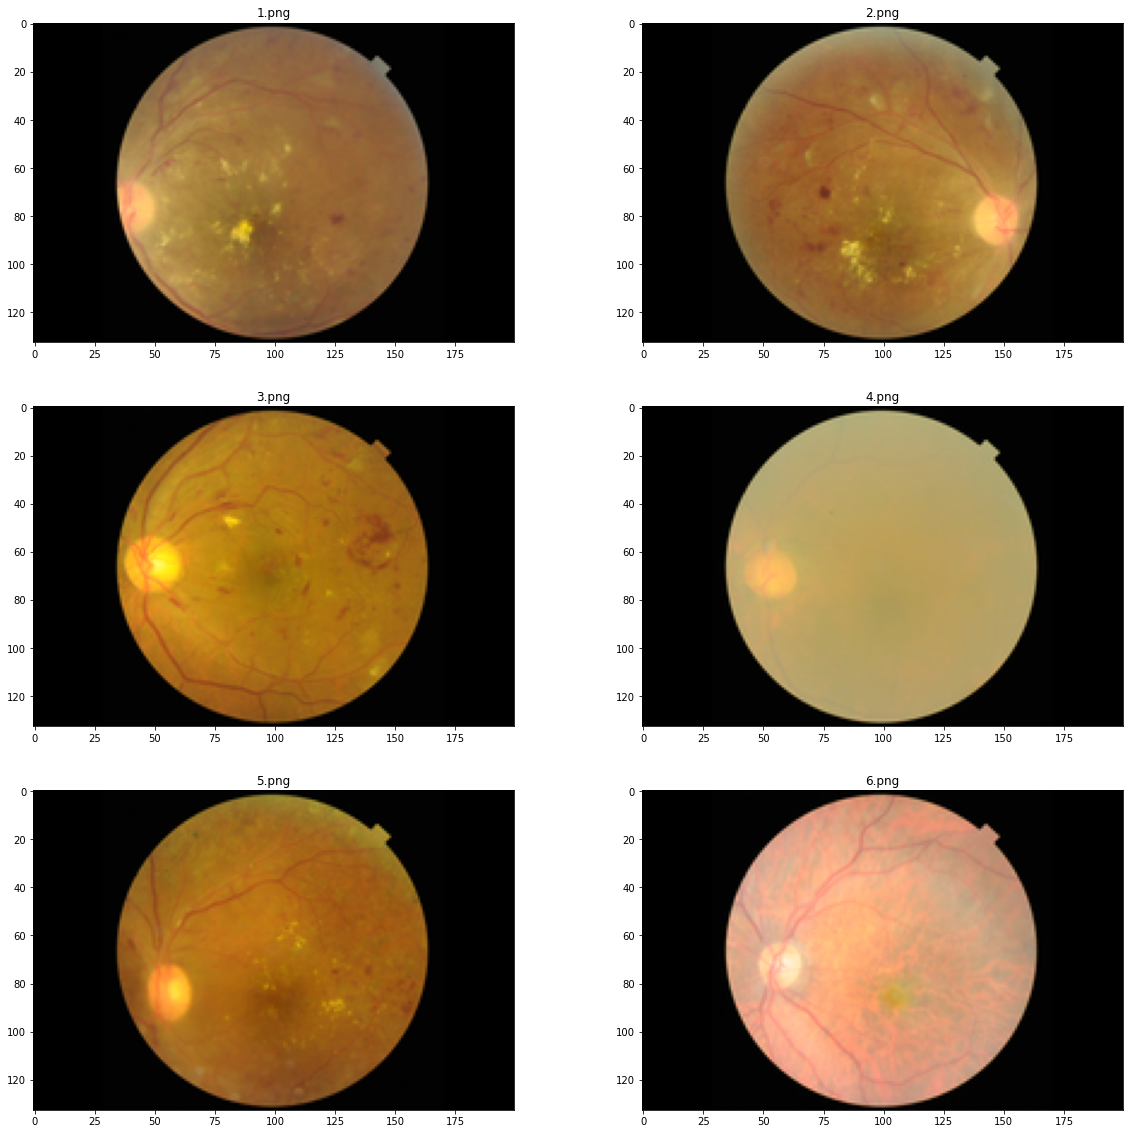

In [21]:
# Use the training location to print a few photos for reference
training_loc = 'data/Training_Set/Training_Set/Training/{0}.png'

plt.figure(figsize=(20,20))
# Look at a few of the images before reading and normalizing them using the 
for i in range(6):
    loc = training_loc.format(i+1)
    img = Image.open(loc)
    img.thumbnail((IMG_HEIGHT, IMG_WIDTH), Image.ANTIALIAS)
    ax = plt.subplot(3, 2, i+1)
    ax.title.set_text("{0}.png".format(i+1))
    plt.imshow(img)

In [7]:
training_labels.shape[0] == training_data.shape[0]

True

In [9]:
validation_data.shape[0] == validation_labels.shape[0]

True

In [10]:
testing_path.shape[0] == test_labels.shape[0]

True